In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def setInsertParse(file):
    df = pd.DataFrame()

    with open(file, "r") as f:
        f.readline() # skip first line
        for line in f.readlines():
            insertCnt = int(line.split(":")[0])
            info = line.strip().replace(")", "").split("(")[1:]
            microseconds = 0
            numDups = 0
            numCollisions = 0
            for i in info:
                isplit = i.split(",")
                microseconds += int(isplit[0])
                numDups += int(isplit[1])
                numCollisions += int(isplit[2])
            
            df = pd.concat([
                df,
                pd.DataFrame.from_dict({
                    "insertCnt": [insertCnt],
                    "microseconds": [microseconds/len(info)],
                    "milliseconds": [microseconds/len(info)/1000],
                    "numDups": [numDups/len(info)],
                    "numCollisions": [numCollisions/len(info)]})
            ], ignore_index=True);

    return df

In [3]:
dfInserNDLin = setInsertParse("benchmark_set_insert_nodups_linear.txt")
dfInserNDQuad = setInsertParse("benchmark_set_insert_nodups_quad.txt")
dfInserNDDouble = setInsertParse("benchmark_set_insert_nodups_doublehash.txt")
dfInserNDQuadReserve = setInsertParse("benchmark_set_insert_nodups_quad_reserve.txt")

dfInserDLin = setInsertParse("benchmark_set_insert_dups_linear.txt")
dfInserDQuad = setInsertParse("benchmark_set_insert_dups_quad.txt")
dfInserDDouble = setInsertParse("benchmark_set_insert_dups_doublehash.txt")

In [4]:
def calcPercs(df):
    df["dupPerc"] = df["numDups"] / df["insertCnt"]
    df["collPerc"] = df["numCollisions"] / df["insertCnt"]


calcPercs(dfInserNDLin)
calcPercs(dfInserNDQuad)
calcPercs(dfInserNDDouble)

calcPercs(dfInserDLin)
calcPercs(dfInserDQuad)
calcPercs(dfInserDDouble)

In [5]:
def linha(dfs, title, types):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title(title)
    ax.set(xlabel="number of inserts")

    df = pd.DataFrame()
    for i in range(len(dfs)):
        df2 = pd.DataFrame([dfs[i]["insertCnt"], dfs[i]["microseconds"], dfs[i]["milliseconds"]]).transpose()
        df2["type"] = types[i]
        df = pd.concat([df, df2]).reset_index(drop=True)
    
    sb.lineplot(data=df, x="insertCnt", y="milliseconds", hue="type", ax=ax);
    
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

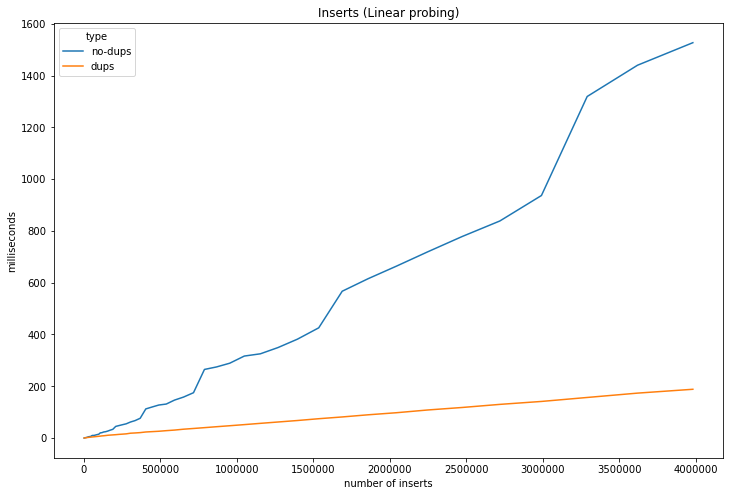

In [6]:
linha([dfInserNDLin, dfInserDLin], "Inserts (Linear probing)", ["no-dups", "dups"])

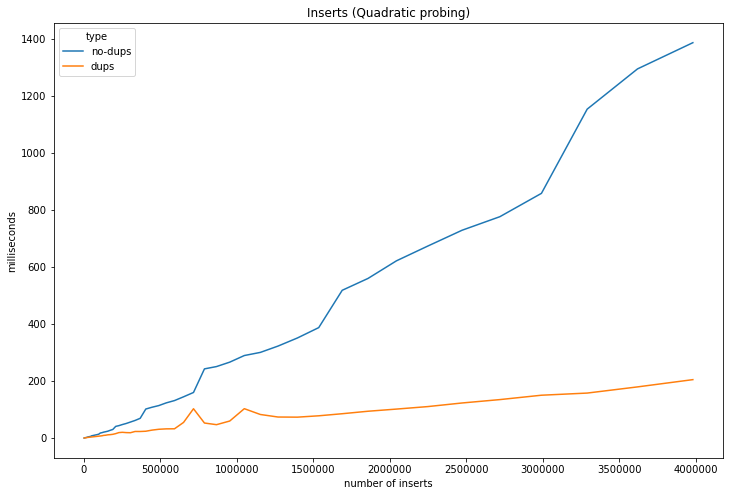

In [7]:
linha([dfInserNDQuad, dfInserDQuad], "Inserts (Quadratic probing)", ["no-dups", "dups"])

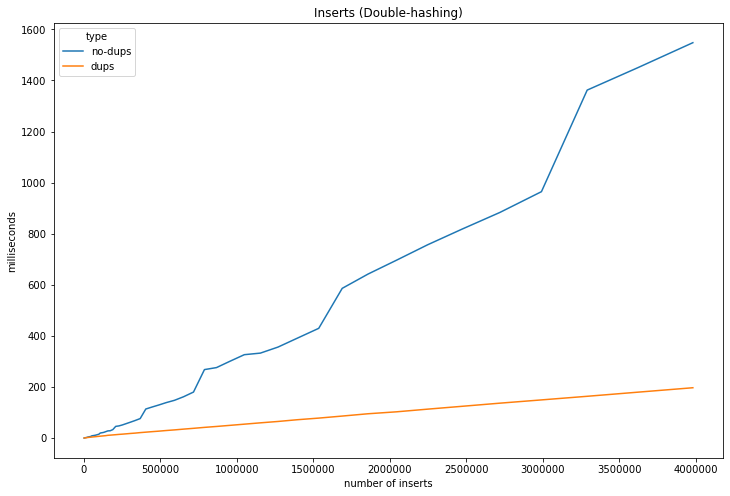

In [8]:
linha([dfInserNDDouble, dfInserDDouble], "Inserts (Double-hashing)", ["no-dups", "dups"])

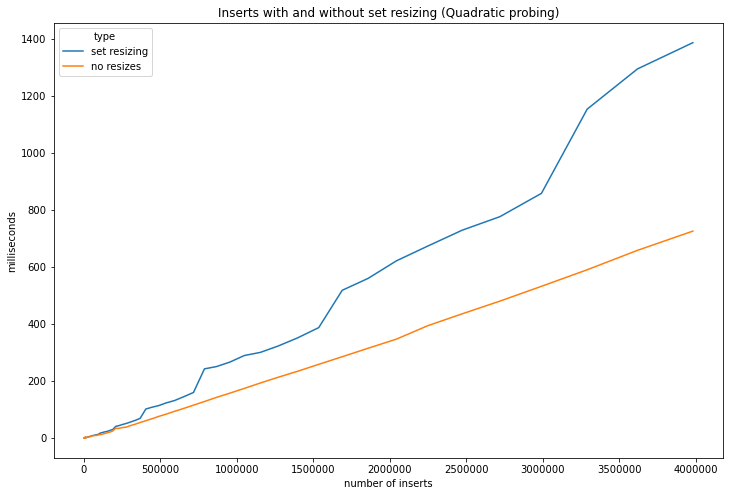

In [9]:
linha([dfInserNDQuad, dfInserNDQuadReserve], "Inserts with and without set resizing (Quadratic probing)", ["set resizing", "no resizes"])

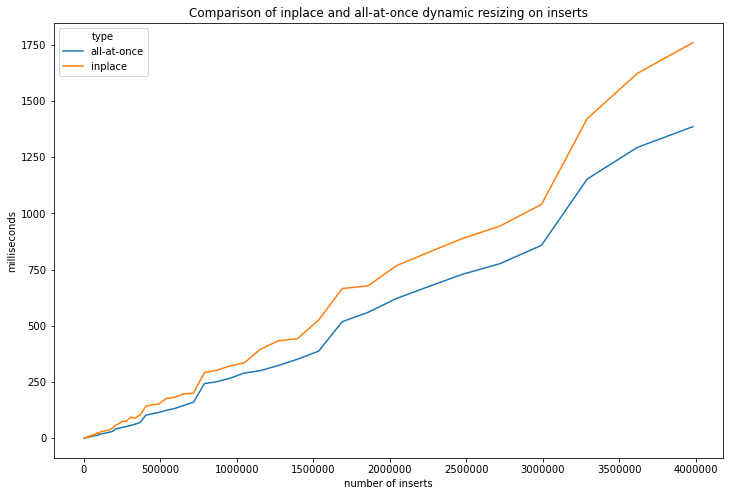

In [31]:
dfInserNDQuadInplace = setInsertParse("benchmark_set_insert_nodups_quad_inplace.txt")
linha([dfInserNDQuad, dfInserNDQuadInplace], "Comparison of inplace and all-at-once dynamic resizing on inserts", ["all-at-once", "inplace"])

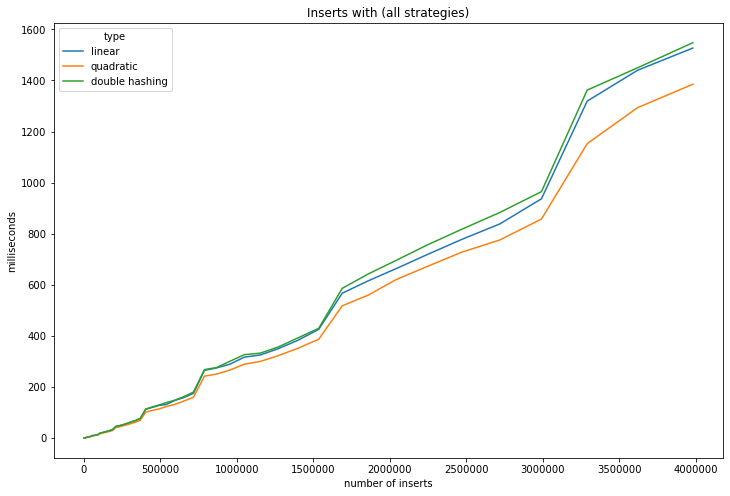

In [10]:
linha([dfInserNDLin, dfInserNDQuad, dfInserNDDouble], "Inserts with (all strategies)", ["linear", "quadratic", "double hashing"])

In [11]:
dfInserDLin.describe()

,insertCnt,microseconds,milliseconds,numDups,numCollisions,dupPerc,collPerc
count,8.800000e+01,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000
mean,4.975486e+05,25127.838636,25.127839,4.789142e+05,6.540201e+05,0.577908,1.767262
std,8.940689e+05,42420.595584,42.420596,8.859738e+05,1.120001e+06,0.365788,0.368329
min,1.000000e+03,113.800000,0.113800,2.880000e+01,2.231400e+03,0.028545,1.249409
25%,7.939500e+03,870.950000,0.870950,1.483550e+03,1.799455e+04,0.186545,1.386006
50%,6.309000e+04,4776.900000,4.776900,4.275000e+04,1.082551e+05,0.677062,1.760650
75%,5.013130e+05,26841.050000,26.841050,4.718188e+05,6.946880e+05,0.941078,2.046813
max,3.981265e+06,188437.200000,188.437200,3.945039e+06,4.974226e+06,0.990901,2.870683


In [12]:
dfInserDQuad.describe()

,insertCnt,microseconds,milliseconds,numDups,numCollisions,dupPerc,collPerc
count,8.800000e+01,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000
mean,4.975486e+05,28521.359091,28.521359,4.789142e+05,6.281077e+05,0.577908,1.416998
std,8.940689e+05,46283.331704,46.283332,8.859738e+05,1.100165e+06,0.365788,0.115444
min,1.000000e+03,106.800000,0.106800,2.880000e+01,1.502800e+03,0.028545,1.228522
25%,7.939500e+03,828.300000,0.828300,1.483550e+03,1.242630e+04,0.186545,1.304528
50%,6.309000e+04,4605.400000,4.605400,4.275000e+04,9.100600e+04,0.677062,1.434772
75%,5.013130e+05,31144.700000,31.144700,4.718188e+05,6.538927e+05,0.941078,1.496883
max,3.981265e+06,204721.000000,204.721000,3.945039e+06,4.891073e+06,0.990901,1.716149


In [13]:
dfInserDDouble.describe()

,insertCnt,microseconds,milliseconds,numDups,numCollisions,dupPerc,collPerc
count,8.800000e+01,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000
mean,4.975486e+05,26074.365909,26.074366,4.789142e+05,6.489442e+05,0.577908,1.424139
std,8.940689e+05,44464.508697,44.464509,8.859738e+05,1.143446e+06,0.365788,0.092531
min,1.000000e+03,104.400000,0.104400,2.880000e+01,1.492800e+03,0.028545,1.277972
25%,7.939500e+03,823.900000,0.823900,1.483550e+03,1.247515e+04,0.186545,1.338765
50%,6.309000e+04,4708.800000,4.708800,4.275000e+04,9.068010e+04,0.677062,1.435409
75%,5.013130e+05,27647.500000,27.647500,4.718188e+05,6.710786e+05,0.941078,1.493111
max,3.981265e+06,197012.400000,197.012400,3.945039e+06,5.087946e+06,0.990901,1.650559


[Text(0.5, 0, '')]

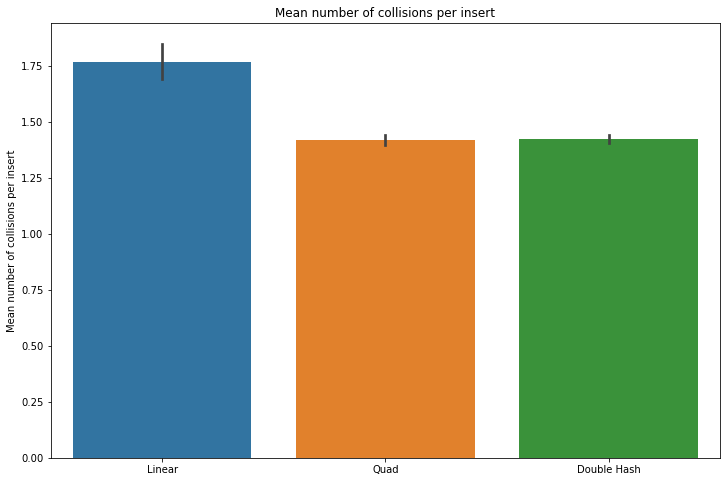

In [14]:
df = pd.DataFrame()

dfs = [dfInserDLin, dfInserDQuad, dfInserDDouble]
types = ["Linear", "Quad", "Double Hash"]
for i in range(len(dfs)):
    df2 = pd.DataFrame([dfs[i]["collPerc"]]).transpose()
    df2["type"] = types[i]
    df = pd.concat([df, df2]).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
sb.barplot(data=df, x="type", y="collPerc", ax=ax);
ax.set_title("Mean number of collisions per insert")
ax.set(ylabel="Mean number of collisions per insert")
ax.set(xlabel="")

In [15]:
def importBenchmarkMerge(file1, type1, file2, type2):
    dfmerge = pd.DataFrame()

    with open(file1, "r") as f:
        f.readline() # skip first line
        for line in f.readlines():
            setSize = int(line.split(":")[0])
            info = line.split(":")[1].strip().split(" ")
            microseconds = 0
            for i in info:
                microseconds += int(i)
            dfmerge = pd.concat([
                    dfmerge,
                    pd.DataFrame.from_dict({
                        "setSize": [setSize],
                        "microseconds": [microseconds/len(info)],
                        "milliseconds": [microseconds/len(info)/1000],
                        "type": type1,
                    })], ignore_index=True);
    
    with open(file2, "r") as f:
        f.readline() # skip first line
        for line in f.readlines():
            setSize = int(line.split(":")[0])
            info = line.split(":")[1].strip().split(" ")
            microseconds = 0
            for i in info:
                microseconds += int(i)
            dfmerge = pd.concat([
                    dfmerge,
                    pd.DataFrame.from_dict({
                        "setSize": [setSize],
                        "microseconds": [microseconds/len(info)],
                        "milliseconds": [microseconds/len(info)/1000],
                        "type": type2,
                    })], ignore_index=True);
    
    return dfmerge


dfmerge = importBenchmarkMerge("benchmark_set_merge.txt", "no-resize", "benchmark_set_merge_resize.txt", "resize")
dfmergesdups = importBenchmarkMerge("benchmark_set_merge_dups.txt", "no-resize", "benchmark_set_merge_dups_resize.txt", "resize")

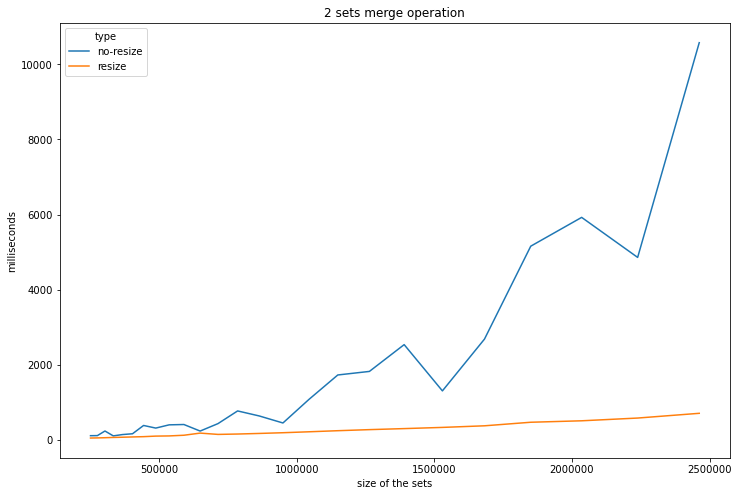

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("2 sets merge operation")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmerge, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

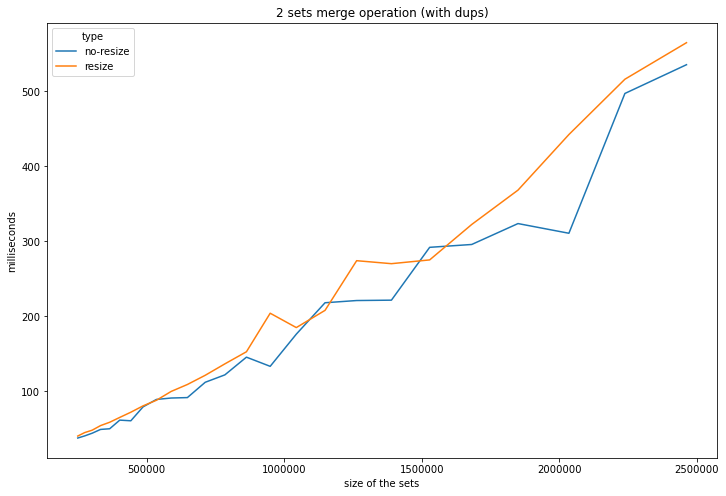

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("2 sets merge operation (with dups)")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmergesdups, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

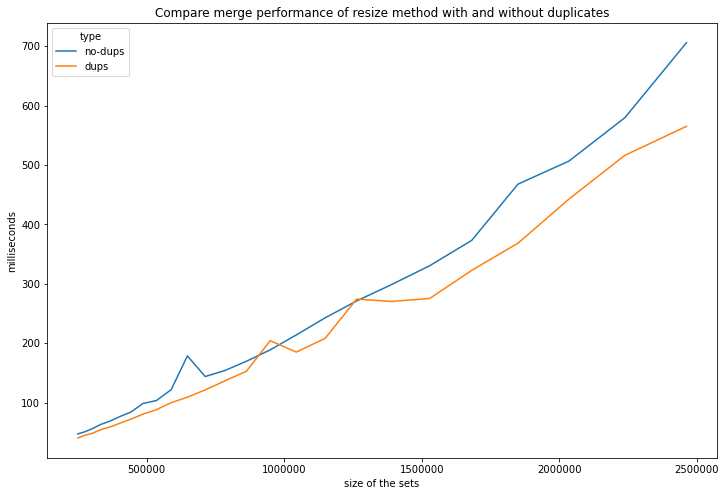

In [18]:
dfmergeresizecmp = importBenchmarkMerge("benchmark_set_merge_resize.txt", "no-dups", "benchmark_set_merge_dups_resize.txt", "dups")
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Compare merge performance of resize method with and without duplicates")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmergeresizecmp, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

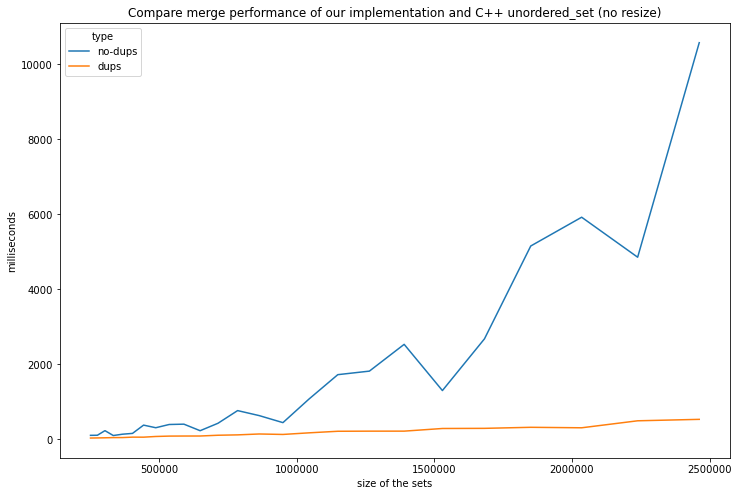

In [27]:
dfmergenoresizecmp = importBenchmarkMerge("benchmark_set_merge.txt", "no-dups", "benchmark_set_merge_dups.txt", "dups")

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Compare merge performance of our implementation and C++ unordered_set (no resize)")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmergenoresizecmp, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

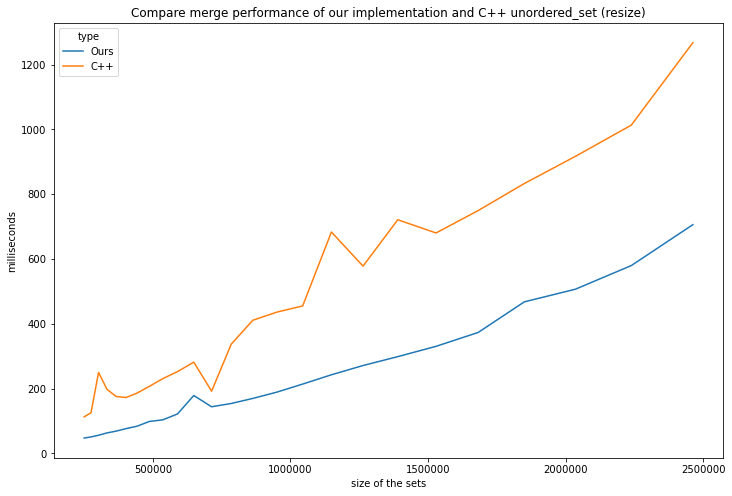

In [28]:
dfmergenoresizecmp = importBenchmarkMerge("benchmark_set_merge_resize.txt", "Ours", "benchmark_cppset_merge.txt", "C++")

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Compare merge performance of our implementation and C++ unordered_set (resize)")
ax.set(xlabel="size of the sets")

sb.lineplot(data=dfmergenoresizecmp, x="setSize", y="milliseconds", hue="type", ax=ax);

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')